# 05_量化择时策略

目录

5.1 什么是量化择时策略

5.2 从技术分析到量化择时策略

5.3 双均线策略

5.4 Python双均线策略实践


## 5.3 双均线策略

### 5.3.1 均线由来

在股票市场中，均线是一个非常常见的名词术语，并且很多量化策略也都围绕着不同的均线展开。

均线也叫移动平均线，是由著名的美国投资专家Joseph E.Granville（格兰威尔）在20世纪中期提出来的，现在仍然广泛为人们使用，成为判断买卖信号的一大指标。从统计角度来说，均线就是历史价格的平均值，可以代表过去N日股价的平均走势。
1962年7月，Joseph E.Granville在他的书中提出了著名的Granville八大买卖法则。只利用股价和均线即可进行择时，方法简单有效，一经提出，迅速受到市场追捧。尤其是其中的金叉和死叉信号，更是沿用至今。Granville 八大法则其中有四条是用于判断买进时机，另外四条是用于判断卖出时机。买进和卖出法则一一对应，分布在高点的左右两侧（除买4和卖4以外）。法则内容如下所示：

- 买1：均线整体上行，股价由下至上上穿均线，此为黄金交叉，形成第一个买点。
- 买2：股价出现下跌迹象，但尚未跌破均线，此时均线变成支撑线，形成第二个买点。
- 买3：股价仍处于均线上方，但呈现急剧下跌趋势。当跌破均线时，出现第三个买点。
- 买4：（右侧）股价和均线都处于下降通道，且股价处于均线下方，严重远离均线，出现第四个买点。


- 卖1：均线由上升状态变为缓慢下降的状态，股价也开始下降。当股价跌破均线时，此为死亡交叉，形成第一个卖点。
- 卖2：股价仍处于均线之下，但股价开始呈现上涨趋势，当股价无限接近均线但尚未突破时，此时均线变成阻力线，形成第二个卖点。
- 卖3：股价终于突破均线，处于均线上方。但持续时间不长，股价开始下跌，直至再一次跌破均线，此为第三个卖点。
- 卖4：（左侧）股价和均线都在上涨，股价上涨的速度远快于均线上涨的速度。当股价严重偏离均线时，出现第四个卖点。


![05_量化择时_双均线策略](../../images/ch05/01_双均线_均线介绍.png)

### 5.3.2 常见均线
常见的均线包括简单移动平均线（SMA）和指数移动平均线（EMA）。

简单移动平均线（SMA）是通过将一段时间内的价格加总，然后除以时间段的长度来计算的。例如，20日简单移动平均线是根据过去20个交易日的收盘价来计算的。

指数移动平均线（EMA）是根据指数平滑系数来计算的，它更加关注最近的价格数据。较新的价格数据会给予更高的权重，而较旧的价格数据则给予较低的权重。EMA的计算公式可以包含一个初始EMA值，以及指数平滑系数。

均线可以帮助分析趋势和价格的走势，以及确定潜在的买入和卖出信号。例如，当价格上涨并且价格位于均线之上时，这可能被视为一个买入信号。相反，当价格下跌并且价格位于均线之下时，这可能被视为一个卖出信号。

许多量化策略使用不同时间长度的均线来比较，以确定交易信号。例如，交叉均线策略使用两条不同长度的移动均线，当短期均线穿过长期均线时产生交易信号。

需要注意的是，均线是一种技术工具，仅作为参考和辅助分析工具。在使用均线进行决策时，还需要结合其他技术指标和市场因素进行综合分析。

### 5.3.3 均线计算

我们结合金融软件具体查看一下该指标。目前各大金融软件基本都提供移动平均值的计算，如下截图展示了平安银行（000001.SZ）
2023年4月到6月的估价走势，在右上角展示了5日移动平均值（M5）、10日移动平均值（M10）、20日移动平均值（M20）、30日移动平均值（M30）。
为了进一步计算验证，本文拉取了20230501 - 20230630 交易日每天的日行情数据，根据收盘价计算，可以看出该[计算结果](result.csv)与金融产品上展示的数据一致。



![05_量化择时_双均线策略](../../images/ch05/02_双均线_平安银行.png)

![05_量化择时_双均线策略](../../images/ch05/03_双均线_移动平均计算.png)

**代码示例**

In [5]:
"""
使用tushare库来获取股票数据，并对数据进行处理和计算移动平均值。
"""
import tushare as ts

# https://tushare.pro/user/token
tushare_token = '0858b935f4518d9e56ffeb19910dc13e296291364ea1d7bd574eb84b'
ts.set_token(tushare_token)
pro = ts.pro_api(tushare_token)

# 个股数据 https://tushare.pro/document/2?doc_id=27
# 从tushare获取个股数据，从2023年5月1日到2023年6月30日期间获取股票代码为000001.SZ的数据，字段包括交易代码、交易日期和收盘价。
df = pro.daily(ts_code='000001.SZ', start_date='20230501', end_date='20230630', fields='ts_code,trade_date,close')
df = df.sort_values(by='trade_date')

# 使用.rolling()函数计算收盘价的移动平均值，分别为5天、10天、20天和30天，并将结果存储在M5、M10、M20和M30列中。
df['M5'] = df.close.rolling(window=5).mean().round(2)
df['M10'] = df.close.rolling(window=10).mean().round(2)
df['M20'] = df.close.rolling(window=20).mean().round(2)
df['M30'] = df.close.rolling(window=30).mean().round(2)

# 对数据按交易日期进行降序排序，以便按照日期从新到旧的顺序显示数据。
df = df.sort_values(by='trade_date', ascending=False)
print("前10条数据：\n", df.head(10))
df.to_csv('result.csv', index=False)

前10条数据：
      ts_code trade_date  close     M5    M10    M20    M30
0  000001.SZ   20230630  11.23  11.23  11.36  11.59  11.76
1  000001.SZ   20230629  11.18  11.26  11.38  11.61  11.80
2  000001.SZ   20230628  11.30  11.29  11.44  11.64  11.85
3  000001.SZ   20230627  11.28  11.32  11.49  11.68  11.90
4  000001.SZ   20230626  11.18  11.39  11.55  11.72  11.94
5  000001.SZ   20230621  11.35  11.48  11.64  11.76  12.00
6  000001.SZ   20230620  11.36  11.50  11.70  11.79  12.05
7  000001.SZ   20230619  11.45  11.59  11.75  11.83  12.11
8  000001.SZ   20230616  11.63  11.65  11.80  11.88  12.17
9  000001.SZ   20230615  11.61  11.70  11.83  11.91  12.21


### 5.3.4 双均线策略

**策略原理**：使用两根均线，一根长周期均线，一根短周期均线。当短期均线从下往上穿越长周期均线的时候，买入；当短期均线从上往下穿越长周期均线的时候，卖出。前文介绍的Granville 八大法则也是一种双均线策略，其短周期均线为M1（当日收盘价）。均线根据不同周期有以下分类：

- 短期均线：5、7、10，用于预测短期走势，MA5 和 MA10 又称为短期监测线；
- 中期均线：20、30、60，用于预测中期走势，MA20 和 MA30 又称为警戒线， MA60 则称之为生死线；
- 长期均线：120、250，用于长期走势，MA120 又称为确认线，MA250 则通常被看做反转线，又称为牛熊分界线。


**策略缺陷**：
- **滞后性**：均线归根到底是一种平均值，在应用中存在的最大问题就是滞后性。当出现买入卖出信号时，最佳时机早已过去。举例来说，如果A股票最新价格出现了较大的涨幅，股价和均线都上涨，但均线的速度慢于股价上涨速度。此时，从形态上来看，金叉出现，为买入信号。次日，股价回调，股价下降的速度快于均线下降的速度，形成死叉，为卖点。这样一买一卖不仅没有盈利，反而出现亏损。
- **长短周期难以选择**：如果两根均线的周期接近，比如5日线，10日线，这种非常容易缠绕，不停的产生买点卖点，会有大量的无效交易，交易费用很高。如果两根均线的周期差距较大，比如5日线，60日线，这种交易周期很长，趋势性已经不明显了，趋势转变以后很长时间才会出现买卖点。也就是说可能会造成很大的亏损。所以两个参数选择的很重要，趋势性越强的品种，均线策略越有效。

**策略优化尝试方向**：
- **使用加权移动平均值**：均线策略的一大缺陷是指标具有滞后性，因此可以使用加权移动平均值代替移动平均值。计算时将短期（如昨天）的权重增大，以加强指标的敏感性。
- **不局限于收盘价**：可以尝试将最高价、最低价等加入到加权移动平均值的计算中。
- **自适应调整均线周期**：价格走势进入单边上涨趋势，自适应均线自动缩短周期，采用短期均线，转为向上移动；市场走势进入横盘震荡，自适应均线自动延长周期，采用长期均线，转为横向移动。

## 5.4 Python双均线策略实践

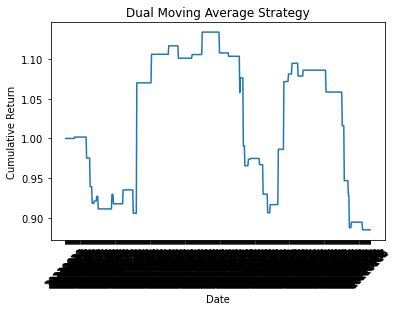

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tushare as ts

# 设置tushare token
# tushare_token = 'your_tushare_token'
tushare_token = '0858b935f4518d9e56ffeb19910dc13e296291364ea1d7bd574eb84b'
ts.set_token(tushare_token)
pro = ts.pro_api()

# 获取股票数据
df = pro.daily(ts_code='000001.SZ', start_date='20210101', end_date='20230630', fields='trade_date,close')

# 计算短期均线和长期均线
df['MA5'] = df['close'].rolling(window=5).mean()
df['MA20'] = df['close'].rolling(window=20).mean()

# 生成交易信号
df['signal'] = np.where(df['MA5'] > df['MA20'], 1, -1)

# 计算当天持仓状态
df['position'] = df['signal'].diff()

# 回测策略
df['return'] = df['close'].pct_change()  # 计算每日收益率
df['strategy_return'] = df['position'].shift() * df['return']  # 计算每日持仓收益

# 计算累计收益率
df['cumulative_return'] = (1 + df['strategy_return']).cumprod()

# 可视化结果
plt.plot(df['trade_date'], df['cumulative_return'])
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Dual Moving Average Strategy')
plt.xticks(rotation=45)
plt.show()

在这个示例代码中，我们使用了tushare库获取了股票代码为000001.SZ的股票数据。然后，计算了其中的短期均线（5日均线）和长期均线（20日均线）。根据这两条均线的交叉情况，生成了买入和卖出的信号。如果短期均线在长期均线之上，产生买入信号（1），如果短期均线在长期均线之下，产生卖出信号（-1）。

接下来，我们根据这些信号计算了每天的持仓状态，持仓状态的变化显示了买入和卖出的时机。然后，通过计算每日收益率和策略的收益率，我们可以回测该策略的表现。最后，我们计算了累计收益率，并使用Matplotlib可视化了策略的表现。

请注意，这只是一个示例代码，你可以根据自己的需求和策略进行修改和优化。在实际应用时，还需要考虑交易成本、滑点、止损和止盈等因素。投资有风险，建议在实际操作之前进行充分的研究和回测。
